In [1]:
from datasets import load_dataset

ds_stream = load_dataset(
    "priyank-m/MJSynth_text_recognition",
    split="train",
    streaming=True
)

print("Dataset streaming initialized")

Resolving data files:   0%|          | 0/25 [00:00<?, ?it/s]

Dataset streaming initialized


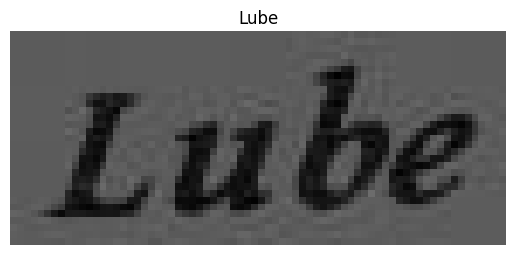

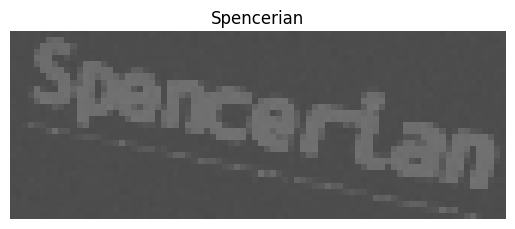

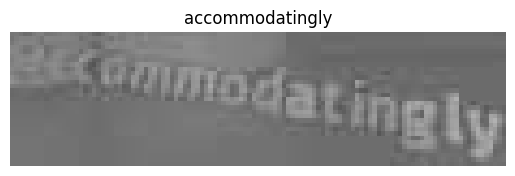

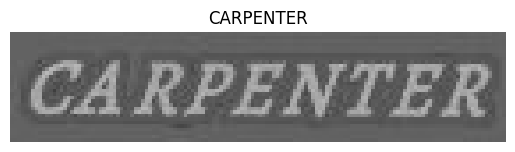

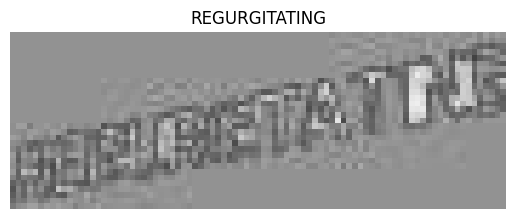

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import itertools

sample_iter = itertools.islice(ds_stream, 5)

for sample in sample_iter:
    img = sample["image"]
    text = sample["label"]

    plt.imshow(img)
    plt.title(text)
    plt.axis("off")
    plt.show()


In [3]:
sample = next(iter(ds_stream))
print(sample.keys())


dict_keys(['image', 'label'])


In [6]:
#Checking the label length distribution
lengths = []

for i, sample in enumerate(ds_stream):
    lengths.append(len(sample["label"]))
    if i == 10_000:   # just sample 10k
        break

print("Max length:", max(lengths))
print("Average length:", sum(lengths)/len(lengths))


Max length: 20
Average length: 8.146085391460854


In [ ]:
# from datasets import load_dataset

# SUBSET_SIZE = 200000   # perfect for resume-level training

# ds = load_dataset(
#     "priyank-m/MJSynth_text_recognition",
#     split="train"
# )

# ds = ds.shuffle(seed=42).select(range(SUBSET_SIZE))

# print("Downloaded samples:", len(ds))


In [1]:
from datasets import load_from_disk
ds = load_from_disk("../data/mjsynth_300k")

In [ ]:
# ds.save_to_disk("../data/mjsynth_300k")

Saving the dataset (0/1 shards):   0%|          | 0/200000 [00:00<?, ? examples/s]

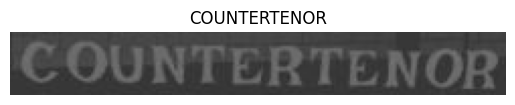

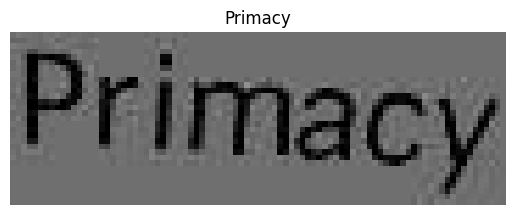

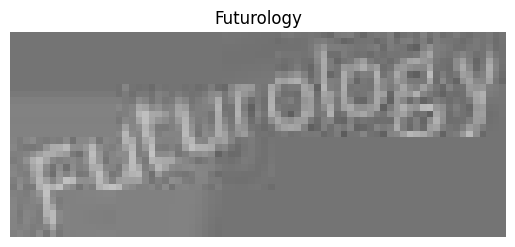

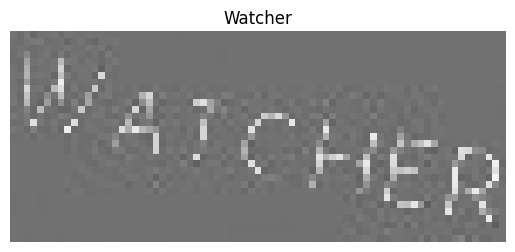

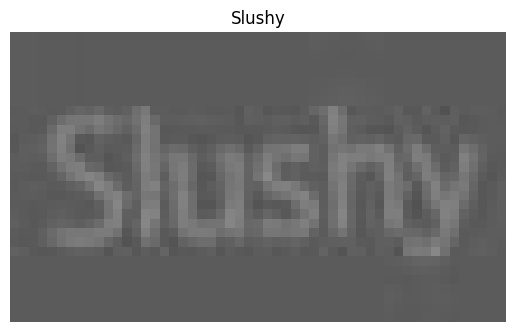

In [2]:
import matplotlib.pyplot as plt

for i in range(5):
    sample = ds[i]
    plt.imshow(sample["image"])
    plt.title(sample["label"])
    plt.axis("off")
    plt.show()
